In [ ]:
# Load Packages
import math
import numpy as np
import pandas as pd
import random
from pandas_datareader import data
import matplotlib.pyplot as plt
%matplotlib inline

# Import data

In [ ]:
# Read Data
test = data.DataReader(['MFRVF', 'SNDL', 'TLRY', 'FUTU', 'GSAT', 'PACB', 'NTXFF', 'EGOV', 'NWAU', 'EH'], 'yahoo', start='2020/02/09', end='2021/02/09')
test = test['Adj Close']
test.head()

Symbols,MFRVF,SNDL,TLRY,FUTU,GSAT,PACB,NTXFF,EGOV,NWAU,EH
Date,,,,,,,,,,
2020-02-10,0.16,1.14,16.010000,11.61,0.46,4.20,4.27,20.193798,0.00010,12.3
2020-02-11,0.16,1.19,16.860001,13.37,0.46,4.14,4.27,20.301998,0.00001,12.4
2020-02-12,0.16,1.17,16.330000,12.82,0.47,4.25,4.27,20.469212,0.00010,12.6
2020-02-13,0.16,1.18,16.129999,12.65,0.46,4.51,4.83,20.774137,0.00010,12.4
2020-02-14,0.16,1.35,17.389999,12.78,0.44,4.57,4.83,20.724957,0.00010,12.0


#Adding daily % change 

In [ ]:
NAMES = ['MFRVF', 'SNDL', 'TLRY', 'FUTU', 'GSAT', 'PACB', 'NTXFF', 'EGOV', 'NWAU', 'EH']
    
for x in NAMES:    
    test['% change ' + x] = test[x].pct_change()


test.head()

Symbols,MFRVF,SNDL,TLRY,FUTU,GSAT,PACB,NTXFF,EGOV,NWAU,EH,% change MFRVF,% change SNDL,% change TLRY,% change FUTU,% change GSAT,% change PACB,% change NTXFF,% change EGOV,% change NWAU,% change EH
Date,,,,,,,,,,,,,,,,,,,,
2020-02-10,0.16,1.14,16.010000,11.61,0.46,4.20,4.27,20.193798,0.00010,12.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-11,0.16,1.19,16.860001,13.37,0.46,4.14,4.27,20.301998,0.00001,12.4,0.0,0.043860,0.053092,0.151593,0.000000,-0.014286,0.000000,0.005358,-0.9,0.008130
2020-02-12,0.16,1.17,16.330000,12.82,0.47,4.25,4.27,20.469212,0.00010,12.6,0.0,-0.016807,-0.031435,-0.041137,0.021739,0.026570,0.000000,0.008236,9.0,0.016129
2020-02-13,0.16,1.18,16.129999,12.65,0.46,4.51,4.83,20.774137,0.00010,12.4,0.0,0.008547,-0.012247,-0.013261,-0.021277,0.061177,0.131148,0.014897,0.0,-0.015873
2020-02-14,0.16,1.35,17.389999,12.78,0.44,4.57,4.83,20.724957,0.00010,12.0,0.0,0.144068,0.078115,0.010277,-0.043478,0.013304,0.000000,-0.002367,0.0,-0.032258


In [ ]:
NAMES = ['MFRVF', 'SNDL', 'TLRY', 'FUTU', 'GSAT', 'PACB', 'NTXFF', 'EGOV', 'NWAU', 'EH']

def semi_cov_2(name_1, name_2):
    matrix_1 = test['% change ' + name_1][1:].to_numpy()
    matrix_2 = test['% change ' + name_2][1:].to_numpy()
    B_1 = np.average(matrix_1)
    B_2 = np.average(matrix_2)
    cov = 0
    n = matrix_1.size
    for index,x in enumerate(matrix_1):
        cov += min(x - B_1, 0)*min(matrix_2[index] - B_2, 0)
    return cov / n 

def semi_cov(NAMES):
    covs = []
    for x in NAMES:
        for y in NAMES:
            covs.append(semi_cov_2(x,y))
    return covs

    
cov = np.array(semi_cov(NAMES)).reshape(10,10)


def risk_function(p):
    return -np.dot(np.dot(p.T, cov), p)


print(cov)

[[4.55524434e-03 1.02575848e-03 3.96589295e-04 3.60001340e-04
  5.17286269e-04 3.22497617e-04 9.16300515e-05 1.23822355e-04
  1.83671898e-02 3.62016162e-04]
 [1.02575848e-03 4.24663887e-03 1.98655154e-03 8.31784657e-04
  1.39189273e-03 1.05497688e-03 8.71996943e-04 4.45234195e-04
  4.59917348e-02 8.35432846e-04]
 [3.96589295e-04 1.98655154e-03 3.47029871e-03 9.82623741e-04
  1.26559467e-03 1.33475592e-03 8.54538323e-04 4.95151942e-04
  3.76724967e-02 1.00419075e-03]
 [3.60001340e-04 8.31784657e-04 9.82623741e-04 1.24883237e-03
  6.99708110e-04 6.84296051e-04 3.84101213e-04 2.12950686e-04
  2.24703176e-02 6.06652758e-04]
 [5.17286269e-04 1.39189273e-03 1.26559467e-03 6.99708110e-04
  1.76865515e-03 8.81559742e-04 6.11583289e-04 3.67462373e-04
  2.93943129e-02 7.16696194e-04]
 [3.22497617e-04 1.05497688e-03 1.33475592e-03 6.84296051e-04
  8.81559742e-04 1.42517627e-03 5.35669294e-04 3.21466101e-04
  2.45438003e-02 6.05135981e-04]
 [9.16300515e-05 8.71996943e-04 8.54538323e-04 3.84101213e

In [ ]:
NAMES = ['MFRVF', 'SNDL', 'TLRY', 'FUTU', 'GSAT', 'PACB', 'NTXFF', 'EGOV', 'NWAU', 'EH']

def calculate_semi_variance(name):
    matrix = test['% change ' + name][1:].to_numpy()
    average = np.average(matrix)
    indexs_lower = np.where(matrix < average)[0]
    count_ = len(indexs_lower)
    values = matrix[indexs_lower]
    semi_var = 0
    for x in values:
        semi_var += math.pow((average - x),2)

    return semi_var/count_

def calculate_expected_result(name):
    name = '% change ' + name
    matrix = test[name][1:].to_numpy()
    average_result = np.average(matrix)
    return average_result




semi_variance = {}
expected_results = {}

for x in NAMES:
    expected_results[x] = calculate_expected_result(x)






In [ ]:
def results_function(p):
    NAMES = ['MFRVF', 'SNDL', 'TLRY', 'FUTU', 'GSAT', 'PACB', 'NTXFF', 'EGOV', 'NWAU', 'EH']
    res = 0
    for index, name in enumerate(NAMES):
        res += expected_results[name] * p[index]

    return res


In [ ]:
print(expected_results)


{'MFRVF': 0.007593827934883872, 'SNDL': 0.00869850621598604, 'TLRY': 0.008432787560988881, 'FUTU': 0.011692711493661459, 'GSAT': 0.009464510908635499, 'PACB': 0.010450748656223028, 'NTXFF': 0.001523498864456135, 'EGOV': 0.0018278527527116966, 'NWAU': 1.184325096898809, 'EH': 0.010479873387741931}


## Setting up NSGA-II algorithm for our portfolio optimization

# Mutation and crossover 

In [ ]:


def insertion_mutation(p):
    def helpr(p,e,indxs):
        HELPER = []
        
        for x in indxs:
            if x>= p and x<e:
                HELPER.append(x)
            
            
        return HELPER
    
    element= np.random.randint(0, len(p)-1)
    place = np.random.randint(0, len(p)-1)
    while(element == place):
        element= np.random.randint(0, len(p)-1)
        place = np.random.randint(0, len(p)-1)
   
    
    if place>element:
        a=place
        b=element
        element=a
        place=b
    
    
  
    helper = p.copy()
    values = helper[helper != p[element]]
    
    INDEXS = []

    for x in values:
        INDEXS.append(list(helper).index(x))
        
   
    END_INDXS = helpr(place,element,INDEXS)
    p[place] = helper[element]
    
    VALUES = helper[END_INDXS]
    
    END_INDXS = np.array(END_INDXS)
    END_INDXS = END_INDXS + 1
    END_INDXS = list(END_INDXS)
 
    p[END_INDXS] = VALUES

    return p


# Helper functions for algorithm


In [ ]:
def non_dominating_curve_plotter(objective1_values, objective2_values):
    plt.figure(figsize=(15,8))
    objective1 = [i*-1 for i in objective1_values]
    objective2 = [j*-1 for j in objective2_values]
    plt.xlabel('Expected results', fontsize=15)
    plt.ylabel('Risk function', fontsize=15)
    plt.scatter(objective1, objective2, c='red', s=25)

def index_locator(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_locator(min(values),values) in list1:
            sorted_list.append(index_locator(min(values),values))
        values[index_locator(min(values),values)] = math.inf
    return sorted_list


def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    sorted1 = sort_by_values(front, values1[:])
    sorted2 = sort_by_values(front, values2[:])
    distance[0] = 4444444444444444
    distance[len(front) - 1] = 4444444444444444
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

def crossover(a,b):
    r=random.random()
    if r>0.5:
        return mutation((a+b)/2)
    else:
        return mutation(a)
    
    
def mutation(solution):
    i = np.random.randint(0,4)
    j = np.random.randint(0,4)
    while (i==j):
        j= np.random.randint(0,4)
    percent = solution[i]*0.4
    solution[j] +=percent
    solution[i] -=percent

    return solution

In [ ]:
def non_dominated_sorting_algorithm(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)
    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front

In [ ]:
print(expected_results)

{'MFRVF': 0.007593827934883872, 'SNDL': 0.00869850621598604, 'TLRY': 0.008432787560988881, 'FUTU': 0.011692711493661459, 'GSAT': 0.009464510908635499, 'PACB': 0.010450748656223028, 'NTXFF': 0.001523498864456135, 'EGOV': 0.0018278527527116966, 'NWAU': 1.184325096898809, 'EH': 0.010479873387741931}


# NSGA-II

In [ ]:
def nsga2(population,max_gen, f1, f2, n):
    objective1 = f1
    objective2 = f2
    gen_no=0
    solution = []
    for i in range(population):
        p = np.random.randint(0,100000,n)
        p = p/np.sum(p)
        solution.append(p)

    while(gen_no<max_gen):
        objective1_values = [objective1(solution[i])for i in range(0,population)]
        objective2_values = [objective2(solution[i])for i in range(0,population)]
        non_dominated_sorted_solution = non_dominated_sorting_algorithm(objective1_values[:],objective2_values[:])
        print('Best Front for Generation:',gen_no)
        for values in non_dominated_sorted_solution[0]:
            print(solution[values],end=" ")
            print(objective1(solution[values]) + objective2(solution[values]))
        print("\n")
        crowding_distance_values=[]
        for i in range(0,len(non_dominated_sorted_solution)):
            crowding_distance_values.append(crowding_distance(objective1_values[:],objective2_values[:],non_dominated_sorted_solution[i][:]))
        solution2 = solution[:]
        
        while(len(solution2)!=2*population):
            a1 = random.randint(0,population-1)
            b1 = random.randint(0,population-1)
            solution2.append(crossover(solution[a1],solution[b1]))
        objective1_values2 = [objective1(solution2[i])for i in range(0,2*population)]
        objective2_values2 = [objective2(solution2[i])for i in range(0,2*population)]
        non_dominated_sorted_solution2 = non_dominated_sorting_algorithm(objective1_values2[:],objective2_values2[:])
        crowding_distance_values2=[]
        for i in range(0,len(non_dominated_sorted_solution2)):
            crowding_distance_values2.append(crowding_distance(objective1_values2[:],objective2_values2[:],non_dominated_sorted_solution2[i][:]))
        new_solution= []
        for i in range(0,len(non_dominated_sorted_solution2)):
            non_dominated_sorted_solution2_1 = [index_locator(non_dominated_sorted_solution2[i][j],non_dominated_sorted_solution2[i] ) for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front22 = sort_by_values(non_dominated_sorted_solution2_1[:], crowding_distance_values2[i][:])
            front = [non_dominated_sorted_solution2[i][front22[j]] for j in range(0,len(non_dominated_sorted_solution2[i]))]
            front.reverse()
            for value in front:
                new_solution.append(value)
                if(len(new_solution)==population):
                    break
            if (len(new_solution) == population):
                break
        solution = [solution2[i] for i in new_solution]
        gen_no = gen_no + 1
    return [objective1_values, objective2_values, solution]

In [ ]:
objective1_values, objective2_values, solution = nsga2(100,100,results_function, risk_function,10)

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
 0.13472457 0.1234344  0.10387779 0.11489046] 0.10951210450685314
[0.01214916 0.05151567 0.18685354 0.08014969 0.08546643 0.04995009
 0.20696485 0.20114798 0.00859651 0.11720609] 0.015214607208628954
[0.06587773 0.02638199 0.06273548 0.18525471 0.06004929 0.09843724
 0.12572569 0.12739844 0.13064906 0.11749037] 0.13178302954778892
[0.04956815 0.03026498 0.11606603 0.10844316 0.09978018 0.10844739
 0.13294508 0.13943947 0.10182273 0.11322284] 0.10771825229651268
[0.11402945 0.121077   0.04722818 0.13112128 0.06213835 0.17851109
 0.03906601 0.01343479 0.22478848 0.06860537] 0.19183604184319028
[0.15846239 0.03887491 0.09661713 0.049361   0.06781818 0.11615416
 0.11005374 0.11039101 0.14108379 0.11118368] 0.13911777291109498
[0.12927135 0.05620033 0.09356215 0.04413357 0.08090402 0.08217955
 0.14341149 0.15210003 0.1082705  0.109967  ] 0.11276382540273416
[0.11944638 0.05873217 0.03536715 0.13775684 0.05114591 0.0955924
 0.1

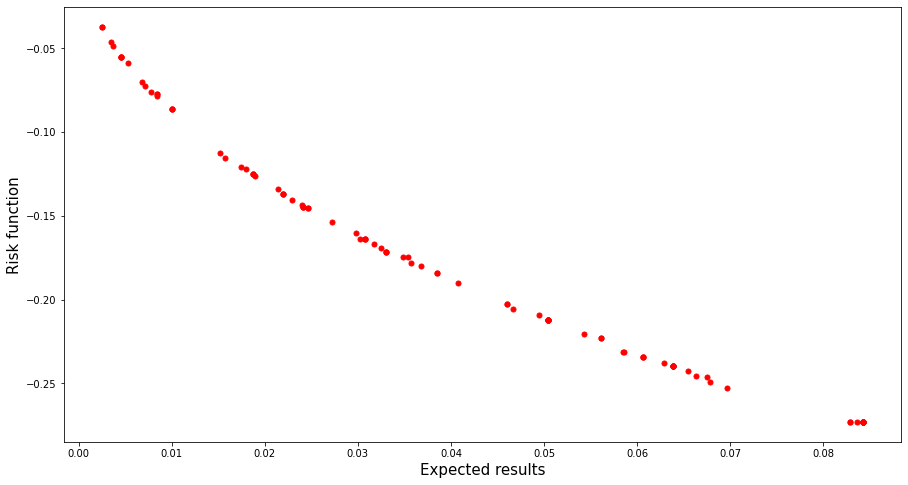

In [ ]:

non_dominating_curve_plotter(objective2_values, objective1_values)